<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-qi/blob/master/porosity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-qi

Cloning into 'reservoir-qi'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 44 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


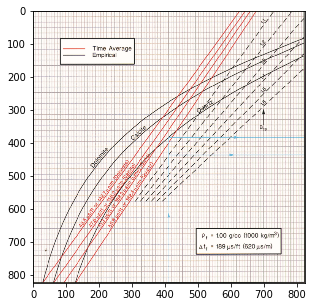

In [5]:
sphi = plt.imread('/content/reservoir-qi/well-log-charts/Fig 14-2 traveltime_to_sonicporosity.PNG')
plt.figure(figsize=(15, 5))
plt.imshow(sphi)

Text(0, 0.5, 'Sonic Porosity (%)')

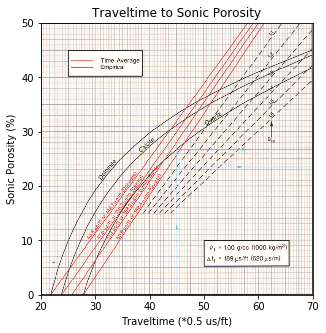

In [13]:
extent = (20, 70, 0, 50) # format: (x axis 1, x axis 2, y axis 1, y axis 2)
plt.figure(figsize=(5, 5))
plt.imshow(sphi, extent=extent)
plt.title("Traveltime to Sonic Porosity")
plt.xlabel("Traveltime (*0.5 us/ft)"); plt.ylabel("Sonic Porosity (%)")